# Clustering with K-Means Algorithms

### By Wilson Peguero Rosario

## Assignment Description
Clustering is an unsupervised machine learning method used for grouping similar data in datasets so it can be easily understood and manipulated. One such algorithm, k-means, takes data and learns how it can be grouped. Some real-world examples of its use include fake news identification, fantasy league stat analysis, insurance fraud detection, or customer/market segmentation.

To perform a k-means analysis using the k-means algorithm, complete the following:

1. Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 data sets that are suitable for use in a clustering task. For this part of the exercise, you must choose two of these datasets, provided they include at least 10 attributes and 10,000 instances.
2. Ensure that the datasets are suitable for clustering using these methods.
3. You may search for data in other repositories, such as Data.gov or Kaggle.

For your selected datasets, build a K-means clustering model.

1. Start by choosing the number of clusters. Discuss how you would find the optimal number of clusters that best fits the dataset.
2. Randomly pick k centroids "not necessarily from your dataset" (or points that will be the center of your clusters) in d-space. Try to make them near the data but different from one another.
3. Assign each data point to the closest centroid. This will form your k clusters. Apply the Euclidian distance to form your clusters.
4. Move the centroids to the average location of the data points assigned to it.
5. Repeat the preceding two steps until the assignments do not change or change very little.

**Note**: A key objective is to minimize the variation within the clusters defined as **the sum of squared Euclidean distances between items and the corresponding centroid**.

1. Explain the dataset and the type of information you wish to gain by applying a clustering method.
2. Explain the k-means algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).
3. Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.
4. Clean the data and address unusual phenomena (e.g., outliers); use illustrative diagrams and plots and explain them.
5. Formulate two questions that can be answered by performing a clustering analysis using the k-means.
6. Use the elbow method to find the optimal number of clusters for your chosen dataset. Justify your chosen (final) value of k.
7. Perform k-means analysis. Explain the intuition behind each mathematical step.
8. Interpret the results in the context of the questions you asked.
9. Discuss how you minimized the variation within the clusters.
10. Validate your model. Then, explain the results.
11. Include all mathematical formulas used and graphs representing the final outcomes.

Prepare a comprehensive technical report as a markdown document or Jupyter notebook, including all code, code comments, all outputs, plots, and analysis. Make sure the project documentation contains a) problem statement, b) algorithm of the solution, c) analysis of the findings, and d) references.

#### Preliminary adjustments

In [15]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)

## Solution

### Problem Statement

Identifying animals in the wild can be very dangerous. Often times, cameras are left in key positions based on tracks and markers indicating that these dangerous animals pass through the area for the sake of obtaining a recording of these animals in the wild. When thinking of this a question comes to mid, what about the animals that are difficult to find and that one has a small amount of data on? If one is able to identify rare animals based on simply the sound of their call or cry, it would greatly assist biologists and environmentalists to identify new  or old species within an ecosystem. This data set (Frogs MFCCs dataset) introduces segmented calls for 4 families of frogs to identify.

### Data Processing

In [16]:
import random
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, silhouette_score

df__frog_calls = pd.read_csv(r'frog_calls/Frogs_MFCCs.csv')
df__frog_calls.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


Now that the data set has been loaded, one is able to view that majority of the features that can be utilized for classification are numerical in nature. Creating a matrix of scatterplots to view the association between the numerical values may assist in determining the relationship between the explanatory variables.

array([[<AxesSubplot:xlabel='MFCCs_ 1', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 2', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 3', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 4', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 5', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 6', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 7', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 8', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_ 9', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_10', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_11', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_12', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_13', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_14', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_15', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_16', ylabel='MFCCs_ 1'>,
        <AxesSubplot:xlabel='MFCCs_17', 

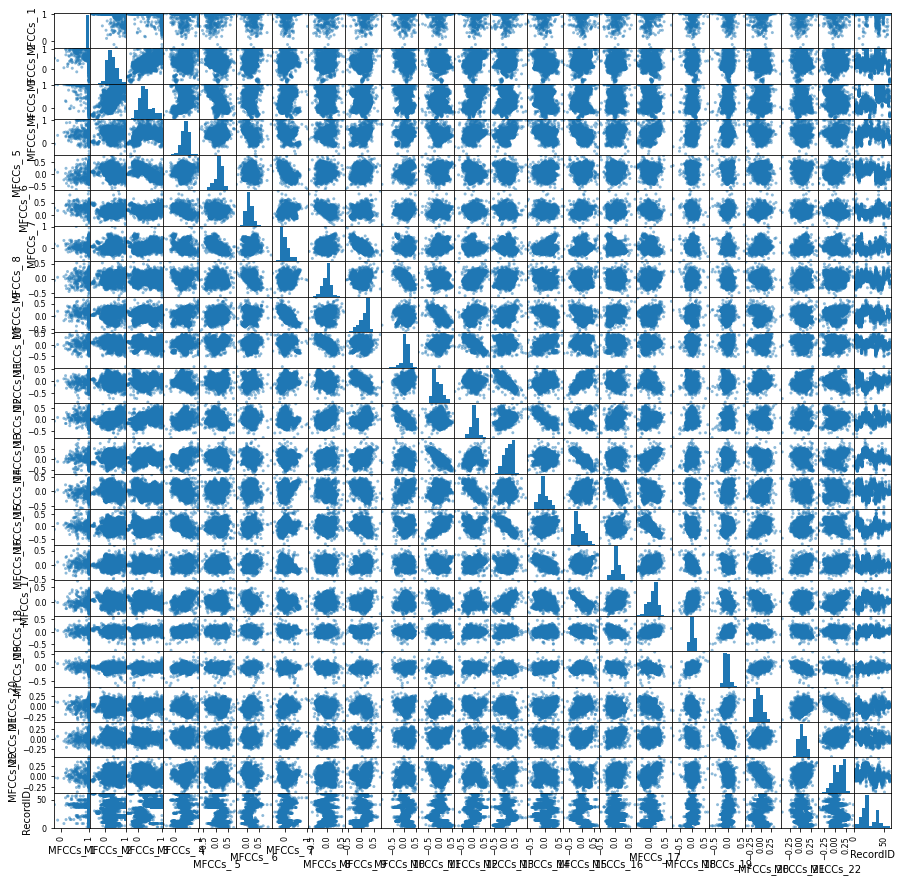

In [17]:
pd.plotting.scatter_matrix(df__frog_calls)

An observation of the correlation matrix allows one to view the following relationship between the explanatory variables.

In [18]:
corr_matrix = df__frog_calls.corr()
corr_matrix\
    .style\
        .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)\
            .format(precision=2)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
MFCCs_ 1,1.00,-0.26,-0.31,0.02,0.19,-0.22,-0.07,0.04,-0.00,0.05,-0.02,-0.05,0.07,0.01,-0.10,0.01,0.12,-0.00,-0.14,-0.09,0.07,0.08,-0.14
MFCCs_ 2,-0.26,1.00,0.61,-0.04,-0.42,0.05,0.23,0.23,-0.04,-0.23,0.06,0.13,-0.17,-0.01,0.27,-0.06,-0.27,0.05,0.20,0.13,-0.04,-0.20,0.06
MFCCs_ 3,-0.31,0.61,1.00,0.03,-0.76,0.18,0.44,0.04,-0.19,-0.19,0.21,0.25,-0.18,-0.09,0.21,-0.02,-0.19,0.07,0.23,0.34,-0.06,-0.41,0.49
MFCCs_ 4,0.02,-0.04,0.03,1.00,0.17,-0.61,-0.40,0.32,0.45,-0.10,-0.45,0.31,0.52,-0.37,-0.54,0.25,0.55,0.11,-0.38,-0.41,0.23,0.46,-0.27
MFCCs_ 5,0.19,-0.42,-0.76,0.17,1.00,-0.12,-0.70,-0.07,0.38,0.15,-0.24,-0.07,0.17,-0.11,-0.19,0.20,0.18,-0.14,-0.15,-0.29,-0.02,0.37,-0.34
MFCCs_ 6,-0.22,0.05,0.18,-0.61,-0.12,1.00,0.32,-0.60,-0.29,0.18,0.31,-0.15,-0.36,0.16,0.40,-0.07,-0.44,-0.23,0.35,0.46,-0.17,-0.44,0.39
MFCCs_ 7,-0.07,0.23,0.44,-0.40,-0.70,0.32,1.00,-0.12,-0.81,0.09,0.62,-0.33,-0.47,0.49,0.42,-0.46,-0.40,0.11,0.23,0.42,-0.03,-0.50,0.16
MFCCs_ 8,0.04,0.23,0.04,0.32,-0.07,-0.60,-0.12,1.00,0.34,-0.67,-0.34,0.42,0.23,-0.26,-0.15,0.11,0.17,0.13,-0.24,-0.29,0.19,0.25,-0.19
MFCCs_ 9,-0.00,-0.04,-0.19,0.45,0.38,-0.29,-0.81,0.34,1.00,-0.22,-0.85,0.45,0.67,-0.55,-0.54,0.50,0.49,-0.10,-0.27,-0.43,0.04,0.52,-0.05
MFCCs_10,0.05,-0.23,-0.19,-0.10,0.15,0.18,0.09,-0.67,-0.22,1.00,0.26,-0.75,-0.09,0.52,-0.01,-0.27,0.01,0.04,0.07,0.02,-0.16,-0.01,-0.12


The correlation matrix above makes it clearer that there is significant correlation between all of the Mel-frequency cepstral coefficients (MFCCs). According to the description within the data set this data is already normalized, meaning that it does not require further analysis and can be utilized in  its current condition.

The final condition is to remove the pre-existing label from the data set.

In [19]:
X = df__frog_calls.drop(['Family','Genus','Species','RecordID'], axis=1)


Now that the existing data labels have been removed, one should be able to move on to the data modelling phase.

### Data Modeling

Before training the model, one must first find the ideal number of clusters, this can be done through the elbow method and confirmed through the silhouette method.

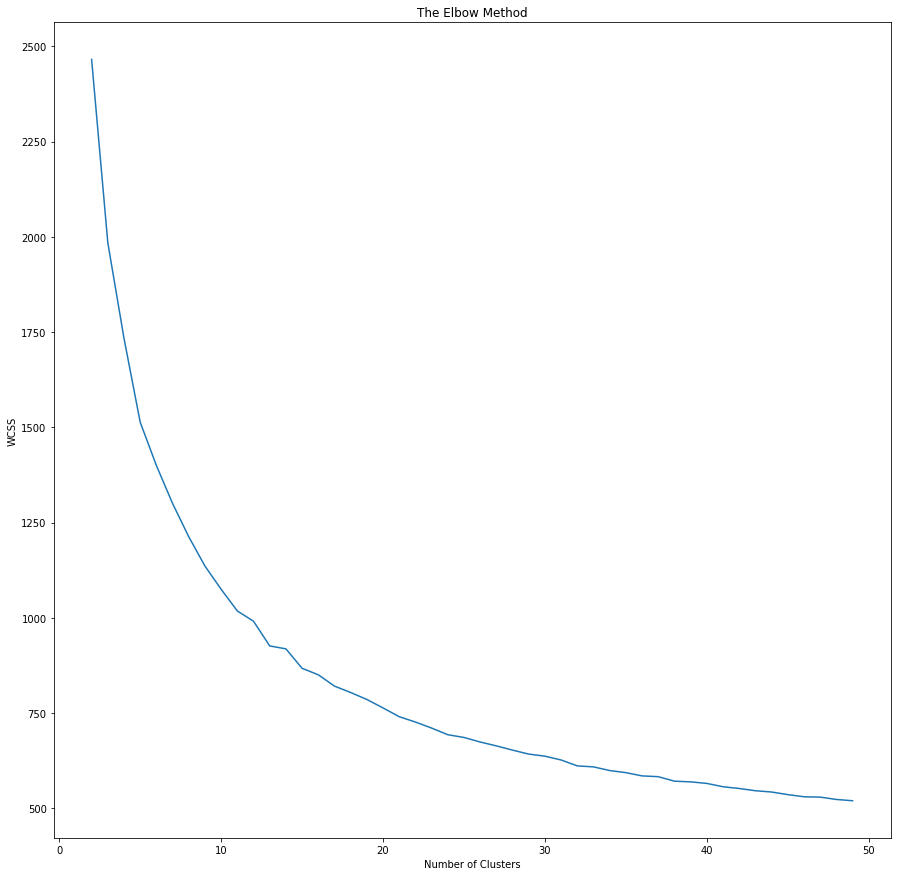

In [20]:
wcss = []
sil_method = []
for k in range(2,50):
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    labels = model.labels_
    wcss.append(model.inertia_)
    sil_method.append(silhouette_score(X, labels, metric='euclidean'))

plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(range(2,50), wcss)

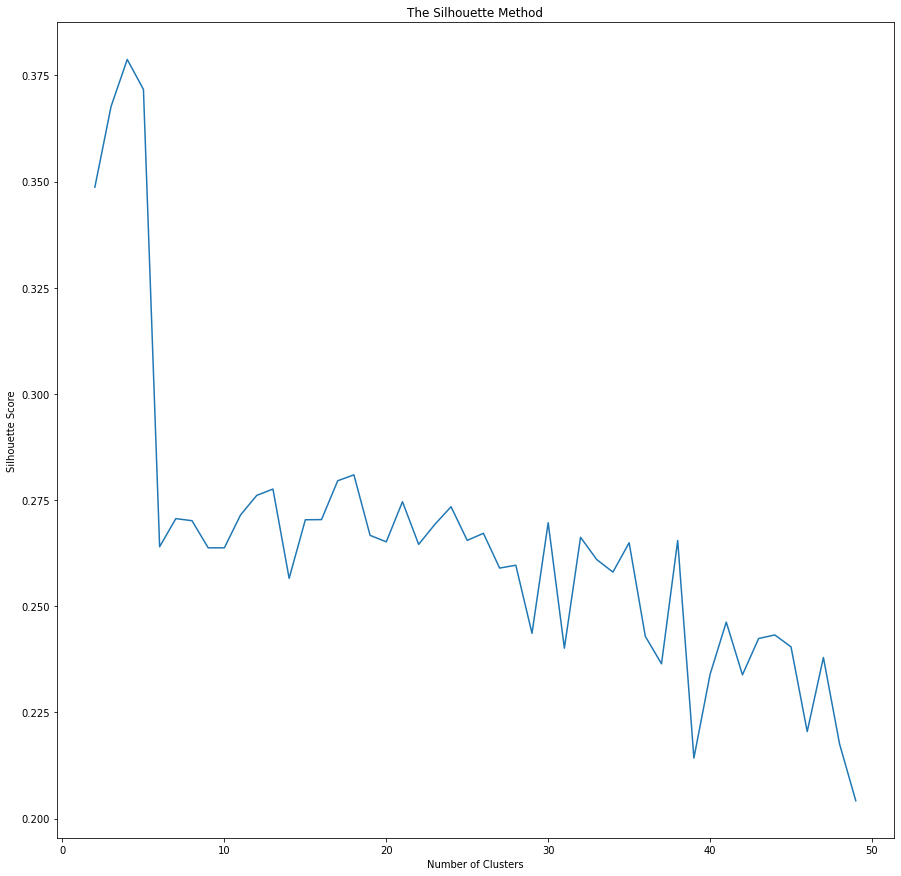

In [21]:
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.plot(range(2,50), sil_method)

From the two graphs above, it seems that the ideal number of clusters falls between k=4 and k=15. In this case, following the silhouette method is best in this case as it accurately predicted that the data set contains segmented calls of 4 different families of frogs (NOTE: The silhouette method calculates k-1 clusters, meaning that when there number of clusters depicted on the x-axis is 3, in reality it is 3+1 which is 4).

In [22]:
kmm = KMeans(n_clusters=4)
kmm.fit(X)
prediction = kmm.predict(X)

df__frog_calls["GROUP"] = prediction
df__frog_calls['Family'] = pd.Categorical(df__frog_calls['Family'])
dict__cat = dict(enumerate(df__frog_calls['Family'].cat.categories))
df__frog_calls['Family'] = df__frog_calls['Family'].cat.codes

### Model Evaluation

Now that the models are all in order, one is able to score and evaluate how well the model clustered the records.

In [23]:
print(f'Accuracy                  :{accuracy_score(df__frog_calls["Family"], df__frog_calls["GROUP"])}')
print(f'error rate                :{1-accuracy_score(df__frog_calls["Family"],df__frog_calls["GROUP"])}')
print(f'precision                 :{precision_score(df__frog_calls["Family"],df__frog_calls["GROUP"], average=None).mean()}')
print(f'recall                    :{recall_score(df__frog_calls["Family"], df__frog_calls["GROUP"], average=None).mean()}')

Accuracy                  :0.11952744961779013
error rate                :0.8804725503822098
precision                 :0.13568199670781572
recall                    :0.06937328226725048


From the observations above, one is able to tell clearly that the accuracy of the model at predicting which family the segmented call belongs. The precision and recall scores are also very low. Although this shows that the model is very bad at labeling the data in terms of the family that it belongs to, this does not mean that the model is completely useless. The model itself may be categorizing based on a nonrepresented property that may be more prolific within the data set than the family that the frogs belong in. To conclude, the questions that could have been answered had the data set accurately predicted the family that the frogs belonged to based on the segmented calls is can this algorithm accurately predict segmented calls of frogs within the area? Can the model be nondiscrimant when comparing male frogs vs female frogs?

Both questions had potential, but unfortunately, they cannot be answered as the clustering algorithm has clustered the data not based on family as one had first concluded via the Silhouette method, but rather that there is something more intrinsic within the data set that was utilized to create the clusters.